<a href="https://colab.research.google.com/github/kourosh89/Image-Classification-cifar10/blob/main/Github_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , Dropout , MaxPool2D
import cv2
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print ('dimention of x_train: ' , x_train.shape)
print ('dimention of y_train: ' , y_train.shape)
print ('dimention of x_test: ' , x_test.shape)
print ('dimention of y_test: ' , y_test.shape)

dimention of x_train:  (50000, 32, 32, 3)
dimention of y_train:  (50000, 1)
dimention of x_test:  (10000, 32, 32, 3)
dimention of y_test:  (10000, 1)


In [ ]:
y_train.shape

(50000, 1)

We should make a matrix using labels that contain all labels in the columns

In [ ]:
len(np.unique(y_train))

10

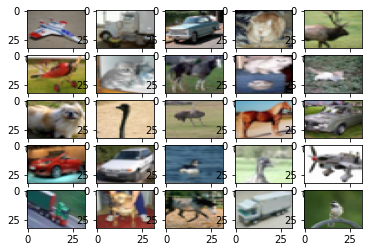

In [ ]:
# visualize images by displaying images
fig, ax = plt.subplots(5, 5)
k = 30

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train , len(np.unique(y_train)))

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test , len(np.unique(y_test)))

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Normalization of pixel values (to [0-1] range)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

In [ ]:
print ('dimention of x_train: ' , x_train.shape)
print ('dimention of y_train: ' , y_train.shape)
print ('dimention of x_test: ' , x_test.shape)
print ('dimention of y_test: ' , y_test.shape)

dimention of x_train:  (50000, 32, 32, 3)
dimention of y_train:  (50000, 10)
dimention of x_test:  (10000, 32, 32, 3)
dimention of y_test:  (10000, 10)


Cheking the size of photos.

if we have different size, we need to make same size fo all

In [ ]:
print(np.unique(np.array([x_train[i].shape[0] for i in range(50000)])))
print(np.unique(np.array([x_train[i].shape[1] for i in range(50000)])))

[32]
[32]


To check sample photo, I used a function to draw a photo

In [ ]:
def draw_photo(number):
  plt.imshow(x_train[number])
  plt.title('photo number'+str(number))
  plt.show()

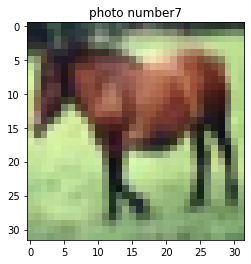

In [ ]:
draw_photo(7)

Designing Model:

In [ ]:
input_shape=(32,32,3)

model = Sequential()

model.add(Conv2D( 32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
# model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
# training data on model
batch_size = 64
epochs = 30
modelname='mymodel.h5'

model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=1e-3,decay=1e-2/epochs) , metrics=["accuracy"])
my_fit=model.fit(x=x_train, y=y_train,
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint(modelname, save_best_only=True)],
                    batch_size=batch_size, epochs=epochs, shuffle=True)

ValueError: ignored

Although we got good result for accuracy of training data, we do not have the top accuracy for validation data.
It looks we have big difference between them. that is why we draw a chart to lokk into with more details

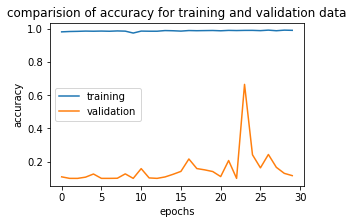

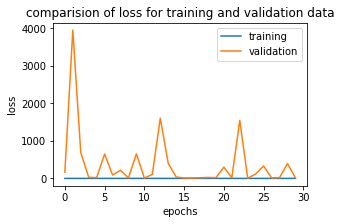

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(range(30) , my_fit.history['accuracy'], my_fit.history['val_accuracy'])
plt.title('comparision of accuracy for training and validation data')
plt.legend(['training','validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.plot(range(30) , my_fit.history['loss'], my_fit.history['val_loss'])
plt.title('comparision of loss for training and validation data')
plt.legend(['training','validation'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout, Rescaling , RandomFlip, RandomRotation, RandomZoom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
input_shape=(32,32,3)

model0 = Sequential()

model0.add(RandomFlip('horizontal',input_shape=(32,32,3)))
model0.add(RandomRotation(0.1))
model0.add(RandomZoom(0.1))

model0.add(Conv2D( 32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model0.add(BatchNormalization())
model0.add(MaxPooling2D((2, 2)))


model0.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D((2, 2)))

model0.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model0.add(BatchNormalization())
model0.add(MaxPooling2D((2, 2)))

model0.add(Flatten())

model0.add(Dense(512, activation='relu'))
model0.add(Dense(256, activation='relu'))

model0.add(Dense(64, activation='relu'))

model0.add(Dropout(0.5))
model0.add(Dense(10, activation='softmax'))

model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 32, 32, 3)        0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)      

In [ ]:
# training data on model
batch_size = 64
epochs = 30
modelname='mymodel.h10'

model0.compile(loss="categorical_crossentropy",optimizer='adam' , metrics=["accuracy"])
my_fit0=model.fit(x=x_train, y=y_train,
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint(modelname, save_best_only=True)],
                    batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/30
775/782 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9919

782/782 [==============================] - 9s 12ms/step - loss: 0.0308 - accuracy: 0.9919 - val_loss: 11.0788 - val_accuracy: 0.1618
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 0.0394 - accuracy: 0.9900 - val_loss: 43.0158 - val_accuracy: 0.1515
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 0.0292 - accuracy: 0.9923 - val_loss: 169.7297 - val_accuracy: 0.1000
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 0.0353 - accuracy: 0.9907 - val_loss: 24.7189 - val_accuracy: 0.1152
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.0309 - accuracy: 0.9916 - val_loss: 631.0207 - val_accuracy: 0.1054
Epoch 6/30
777/782 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9912

782/782 [==============================] - 8s 10ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 7.3468 - val_accuracy: 0.2249
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.0351 - accuracy: 0.9910 - val_loss: 10.2750 - val_accuracy: 0.1795
Epoch 8/30
782/782 [==============================] - 5s 7ms/step - loss: 0.0346 - accuracy: 0.9907 - val_loss: 9275.1162 - val_accuracy: 0.1000
Epoch 9/30
782/782 [==============================] - 6s 7ms/step - loss: 0.0230 - accuracy: 0.9938 - val_loss: 433.1448 - val_accuracy: 0.1130
Epoch 10/30
780/782 [============================>.] - ETA: 0s - loss: 0.0370 - accuracy: 0.9909

782/782 [==============================] - 8s 10ms/step - loss: 0.0369 - accuracy: 0.9910 - val_loss: 5.4925 - val_accuracy: 0.2272
Epoch 11/30
782/782 [==============================] - 6s 8ms/step - loss: 0.0331 - accuracy: 0.9914 - val_loss: 41.6168 - val_accuracy: 0.1121
Epoch 12/30
782/782 [==============================] - 5s 7ms/step - loss: 0.0317 - accuracy: 0.9915 - val_loss: 625.4408 - val_accuracy: 0.0984
Epoch 13/30
782/782 [==============================] - 6s 7ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 40.4681 - val_accuracy: 0.1109
Epoch 14/30
782/782 [==============================] - 5s 7ms/step - loss: 0.0347 - accuracy: 0.9916 - val_loss: 105.0107 - val_accuracy: 0.1002
Epoch 15/30
782/782 [==============================] - 6s 8ms/step - loss: 0.0291 - accuracy: 0.9928 - val_loss: 1019.2136 - val_accuracy: 0.1000
Epoch 16/30
782/782 [==============================] - 5s 7ms/step - loss: 0.0347 - accuracy: 0.9914 - val_loss: 39.1829 - val_accuracy: 0.1348
